# TP Spotify
## Profesor: Ignacio Pardo
## Integrantes: Eric Gerzenstein, Juan Baader, Manuel Pebe Pueyrredón, Joaquín García de García Teuly
### Fecha de entrega del TP: 22/6/24
### Aclaraciones
1) Para correr el código, es necesario tener instaladas las librerías pandas y matplotlib.
2) Chona, disculpanos por el frecuente y mayoritario uso de variables en inglés. Los contenidos del dataset se encontraban todos en inglés, por lo que inconcientemente decidimos mantener la coherencia en el idioma. Aún así, los nombres son bastante claros.
3) Llegamos a hacer hasta el 2 del bonus.

In [35]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1) El dataset contiene información sobre las canciones escuchadas en Spotify. Más específicamente, contiene entre otras, la fecha, el nombre de la canción, el album, el artista, la duración de la canción, cuándo se escucha la canción, nombre de usuario, dispositivo, versión de OS, país desde donde se escucha la canción, etc. No todas las columnas son necesarias para el análisis. Por ejemplo, 'offline' y 'shuffle' no son necesarias. No todos los registros son del mismo tipo. Nos encontramos con objetos, enteros y booleanos. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2024/main/TP_Spotify/StreamingHistory_Extended.csv"

pd.set_option('display.max_rows', None)
spotify : pd.DataFrame = pd.read_csv(archivo)

print(spotify.columns) # Mostrar las columnas
print(spotify.dtypes) # Mostrar los tipos de datos

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'user_agent_decrypted', 'master_metadata_track_name',
       'master_metadata_album_artist_name', 'master_metadata_album_album_name',
       'spotify_track_uri', 'episode_name', 'episode_show_name',
       'spotify_episode_uri', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'offline', 'offline_timestamp', 'is_podcast'],
      dtype='object')
ts                                   object
username                              int64
platform                             object
ms_played                             int64
conn_country                         object
user_agent_decrypted                 object
master_metadata_track_name           object
master_metadata_album_artist_name    object
master_metadata_album_album_name     object
spotify_track_uri                    object
episode_name                         object
episode_show_name                    object
spotify_episode_uri                  objec

C:\Users\User\AppData\Local\Temp\ipykernel_13232\2798303478.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify : pd.DataFrame = pd.read_csv(archivo)


2) Las reproducciones fueron registradas a partir del 27 de junio de 2014 hasta el 23 de mayo de 2024.

In [37]:
print(spotify['ts'].min())
print(spotify['ts'].max())

2014-06-27T18:01:15Z
2024-05-23T23:56:20Z


3) Se escucharon 9708 canciones diferentes en total.

In [38]:
print(spotify['master_metadata_track_name'].nunique())

9708


4) La duración total de las reproducciones de cancioens registradas es de 3495,521066944444 horas.

In [39]:
total = spotify['ms_played'].sum()
print(total / 1000 / 60 / 60)

3495.521066944444


5) El artista más escuchado por tiempo de reproducción es Charly García con 82,03455 horas.

In [40]:
artist_play_time = spotify.groupby('master_metadata_album_artist_name')['ms_played'].sum() / 1000 / 60 / 60
sorted_artist_play_time = artist_play_time.sort_values(ascending=False) # Ordenar de mayor a menor
sorted_artist_play_time.columns = ['Artista', 'Horas']
print(sorted_artist_play_time.head(1))

master_metadata_album_artist_name
Charly García    82.03455
Name: ms_played, dtype: float64


6) La canción más escuchada es Redbone con 15,73 horas.

In [41]:
song_play_time = spotify.groupby('spotify_track_uri')['ms_played'].sum() / 1000 / 60 / 60
sorted_song_play_time = song_play_time.sort_values(ascending=False) # Ordenar de mayor a menor
uri_mas_escuchada = sorted_song_play_time.idxmax() # Obtener el índice de la canción más escuchada
song_row = spotify.loc[spotify['spotify_track_uri'] == uri_mas_escuchada] # Obtener la fila de la canción más escuchada
print(song_row['master_metadata_track_name'].values[0], sorted_song_play_time.max()) # Obtener el nombre de la canción


Redbone 15.732512777777778


7) La canción más escuchada de Charlie García es Hablando a Tu Corazón con 8,723836 horas.

In [42]:
artist = sorted_artist_play_time.head(1).index[0] # Reutilizamos variables ya definidas arriba
song_play_time = spotify[spotify['master_metadata_album_artist_name'] == artist].groupby('master_metadata_track_name')['ms_played'].sum() / 1000 / 60 / 60 
print(song_play_time.sort_values(ascending=False).head(1)) # Ordenar de mayor a menor

master_metadata_track_name
Hablando a Tu Corazón    8.723836
Name: ms_played, dtype: float64


8) El top 10 de artistas más escuchados por tiempo de reproducción es mostrado en el siguiente gráfico:

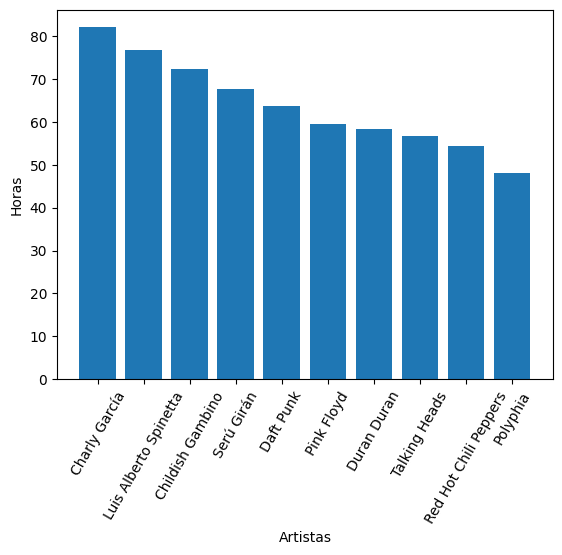

In [43]:
topdiez = sorted_artist_play_time.head(10) # Reutilizamos variables ya definidas arriba
plt.bar(topdiez.index, topdiez.values)
plt.ylabel('Horas')
plt.xlabel('Artistas')
plt.xticks(rotation=60) # Para claridad en los nombres
plt.show()

9) El top 10 de canciones más escuchadas por tiempo de reproducción es mostrado en el siguiente gráfico:

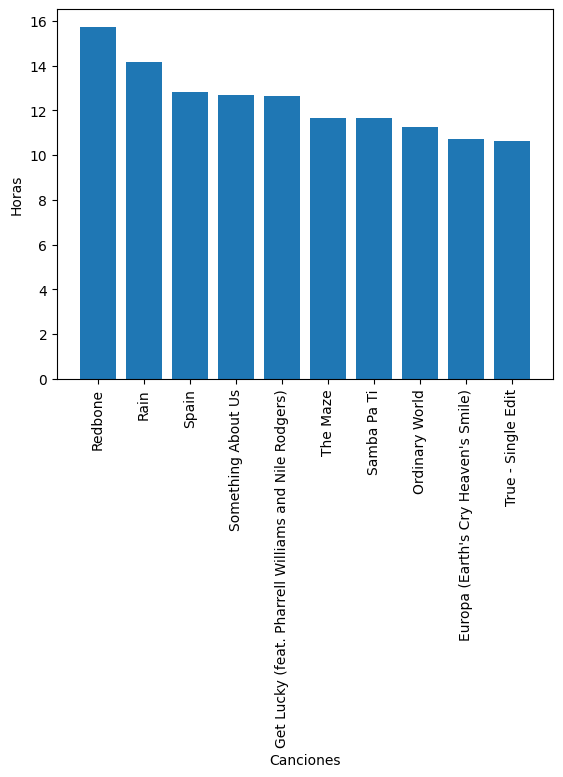

In [44]:
song_play_time = spotify.groupby('spotify_track_uri')['ms_played'].sum() / 1000 / 60 / 60
sorted_song_play_time = song_play_time.sort_values(ascending=False)
top_10_uris = sorted_song_play_time.head(10).index

canciones = []
horas = []

# Loopeamos las canciones más escuchadas para obtener el nombre de cada una
for uri in top_10_uris:
    song_row = spotify.loc[spotify['spotify_track_uri'] == uri]
    song_name = song_row['master_metadata_track_name'].values[0]
    total_play_time = sorted_song_play_time[uri] # Tiempo total de reproducción
    canciones.append(song_name)
    horas.append(total_play_time)
    
plt.bar(canciones, horas)
plt.ylabel('Horas')
plt.xlabel('Canciones')
plt.xticks(rotation=90)
plt.show()

10) Los top 10 sistemas operativos más utilizados para escuchar música son mostrados en el siguiente gráfico:

platform
iOS 11.0 (iPhone8,1)      22734
iOS 12.0 (iPhone8,1)      14525
ios                       13264
OS X 10.15.5 [x86 8]       6464
iOS 13.2.2 (iPhone8,1)     5145
iOS 14.2 (iPhone12,3)      4821
OS X 10.15.1 [x86 8]       4657
OS X 10.15.4 [x86 8]       4272
OS X 12.0.1 [arm 2]        4209
iOS 15.2 (iPhone12,3)      3845
Name: count, dtype: int64


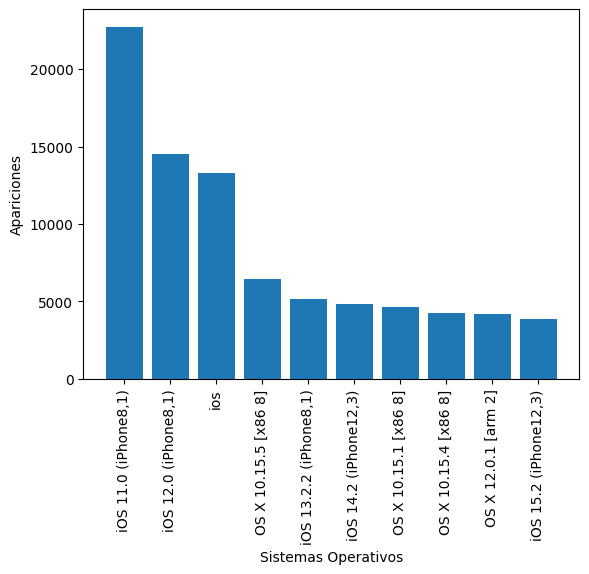

In [45]:
sistemas_operativos = spotify['platform'].value_counts()
topdiez = sistemas_operativos.head(10)
print(topdiez)
plt.bar(topdiez.index, topdiez.values)
plt.ylabel('Apariciones')
plt.xlabel('Sistemas Operativos')
plt.xticks(rotation=90)
plt.show()

11) Sobre toda la media única reproducida, el 1,7305% fue un podcast.

In [46]:
num_podcasts: int = spotify['is_podcast'].sum() # cantidad de podcasts
num_canciones: int = spotify['master_metadata_track_name'].nunique() # cantidad de canciones
print(num_podcasts / num_canciones * 100)

1.73053152039555


12) El top 10 de países desde donde se escuchó música es mostrado en el siguiente gráfico:

conn_country
AR    122666
BR      1852
ZZ       341
Name: count, dtype: int64


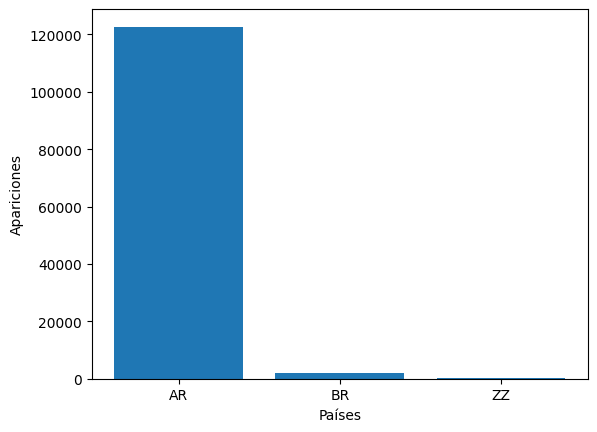

In [47]:
paises = spotify['conn_country'].value_counts() # Contar la cantidad de apariciones de cada país
toptres = paises.head(3)
print(toptres)
plt.bar(toptres.index, toptres.values)
plt.ylabel('Apariciones')
plt.xlabel('Países')
plt.show()

### Bonus, 1 y 2
1) El día en la semana en el que más se escucha música es sábado. El horario en el que más se escucha música son las 10 de la noche. 

In [48]:
spotify['ts'] = pd.to_datetime(spotify['ts']) # to_datetime nos permite convertir una cadena de texto en un objeto datetime (fecha)
spotify['Dia'] = spotify['ts'].dt.day_name() # Usamos la función dy.day_name() para obtener el día de la semana
spotify['Hora'] = spotify['ts'].dt.hour # Usamos la función dy.hour para obtener la hora
print(spotify['Dia'].value_counts().head(1))
print(spotify['Hora'].value_counts().head(1))

Dia
Saturday    23273
Name: count, dtype: int64
Hora
22    13062
Name: count, dtype: int64


2) El mes en el que más se escucha música es abril.

In [49]:
spotify['ts'] = pd.to_datetime(spotify['ts'])
spotify['Mes'] = spotify['ts'].dt.month_name() # Mismo principio que antes, pero con meses
print(spotify['Mes'].value_counts().head(1))

Mes
April    12016
Name: count, dtype: int64
